# **Assignment 1 _ Lorenzo Squarzoni**

# Substitution Ciphers

**Substitution ciphers** are one possible type of encrypction applicable to any plain text; in particular, as the name suggests, they are implemented with a more or less simple substitution of one character with a different one, always with the same relation, extended to every possible character of the alphabet (or more). This kind of cipher has more than one realization: there are, for example, Ceasar ciphers and Simple Substitution ciphers, as we'll see more in detail.

In [79]:
import numpy as np 
import matplotlib.pyplot as plt 
import string
import pickle
import math
import enchant

In [80]:
def generate_alphabet():
    
    '''
    Generate the English alphabet.
    Parameters
    ----------
    None

    Return
    ------
    tuple,
        a tuple of English letters
       
    '''
    
    letters = string.ascii_lowercase
    letters = [letter for letter in letters]
    letters = tuple(letters)
    
    return letters

In [81]:
def left_shift(tuple, shift):

    '''
    Shifts to the left the elements of the given tuple by a quantity equal to shift.
    Parameters
    ----------
    tuple: tuple,
    
    shift: int,
        entity of the shift

    Return
    ------
    tuple,
        the tuple that has been shifted
       
    '''

    length = len(tuple)
    if length != 0:
        shift = shift % length
    else:
        return tuple()
    return tuple[shift:] + tuple[0:shift]

## Caesar Cipher

The first and easiest type of Substituition cipher is called **Ceasar cipher**: in this case, the substitution is performed simply shifting by a particular offset the letters of the used alphabet.

Since the total number of possible values for the offset is equal to the cardinality of the alphabet set (in English is 26), it's straightforward to understand how easy it is to break this type of encryption: with a **brute force** approach, which consists on trying all possible encodings, any computer can rapidly find the solution, just knowing the cipher text.

### Decoder

Once given the entity of the shifting process, what we need to do in order to decode our cipher is the following: we apply the shift to the alphabet tuple, creating a second tuple with the same number of elements; then we need to scroll through the cipher text, letter by letter, and replace each one of them with the corresponding letter of the correct English alphabet, using the index taken by the second tuple and retrieving the correct letter from the first one.

In [82]:
def caesar_decoding(ciphertext, shift=0):
    
    alphabet = generate_alphabet()
    encoded_alphabet = left_shift(alphabet, shift) # Creates the shifted alphabet
    plaintext = ""

    for character in ciphertext:
        if character.lower() in alphabet: # Checks whether the character is a letter or not
            for i, letter in enumerate(encoded_alphabet):
                if (letter == character.lower()):
                    plaintext += alphabet[i] # We append the new decoded letter to the plain text
        else:
            plaintext += character # If the character is not a letter, we append it directly as it is

    return plaintext

In [83]:
# code snippet to test the implementation of the decoder
ciphertext = 'lipps!' # 'hello!' encoded with shift=4
plaintext = caesar_decoding(ciphertext, shift=4)

print(ciphertext, '->', plaintext)

lipps! -> hello!


### Ciphertext

In [84]:
# Load ciphertext
file_path = 'ciphertext_caesar.txt'
with open(file=file_path, mode='r') as f:
    cipher_ceasar = f.read()

### Brute Force

To execute a brute force attack we firstly need to find the key, which in this case is the offset; to discover the offset we can use a trial and error approach, trying to put different numbers to the shift value untill we get something readable as a plain text. This procedure could also be implemented with an authomatic algorithm.

In [85]:
# Perform a Brute Force attack
alphabet = generate_alphabet()

for number in range(len(alphabet)): # We apply every possible value and print every output's first characters
    plain = caesar_decoding(cipher_ceasar, shift=number)
    print(plain[:27], number)

qfmdhcufodvm, cf qfmdhczcum 0
pelcgbtencul, be pelcgbybtl 1
odkbfasdmbtk, ad odkbfaxask 2
ncjaezrclasj, zc ncjaezwzrj 3
mbizdyqbkzri, yb mbizdyvyqi 4
lahycxpajyqh, xa lahycxuxph 5
kzgxbwozixpg, wz kzgxbwtwog 6
jyfwavnyhwof, vy jyfwavsvnf 7
ixevzumxgvne, ux ixevzurume 8
hwduytlwfumd, tw hwduytqtld 9
gvctxskvetlc, sv gvctxspskc 10
fubswrjudskb, ru fubswrorjb 11
etarvqitcrja, qt etarvqnqia 12
dszquphsbqiz, ps dszqupmphz 13
cryptography, or cryptology 14
bqxosnfqzogx, nq bqxosnknfx 15
apwnrmepynfw, mp apwnrmjmew 16
zovmqldoxmev, lo zovmqlildv 17
ynulpkcnwldu, kn ynulpkhkcu 18
xmtkojbmvkct, jm xmtkojgjbt 19
wlsjnialujbs, il wlsjnifias 20
vkrimhzktiar, hk vkrimhehzr 21
ujqhlgyjshzq, gj ujqhlgdgyq 22
tipgkfxirgyp, fi tipgkfcfxp 23
shofjewhqfxo, eh shofjebewo 24
rgneidvgpewn, dg rgneidadvn 25


In this case, reading the output, we get that the key is 14. 

Of course this isn't an efficient way to do this!
I propose a couple of ways to do this procedure authomatically at the end of the notebook.

In [86]:
key = 14

# Print decrypted plaintext and the key (shift)
decrypted_text = caesar_decoding(cipher_ceasar, shift=key)
print("The key is: " + str(key))
print(decrypted_text) 

The key is: 14
cryptography, or cryptology (from ancient greek: κρυπτός, romanized: kryptós "hidden, secret"; and γράφειν graphein, "to write", or -λογία -logia, "study", respectively), is the practice and study of techniques for secure communication in the presence of third parties called adversaries. more generally, cryptography is about constructing and analyzing protocols that prevent third parties or the public from reading private messages; various aspects in information security such as data confidentiality, data integrity, authentication, and non-repudiation are central to modern cryptography. modern cryptography exists at the intersection of the disciplines of mathematics, computer science, electrical engineering, communication science, and physics. applications of cryptography include electronic commerce, chip-based payment cards, digital currencies, computer passwords, and military communications.
cryptography prior to the modern age was effectively synonymous with encryptio

## Simple Substitution Cipher

**Simple Substitution cipher** is performed with the substitution of each letter or even character of one plain text with different letters or characters, without any shifting; of course, since each individual letter is replaced always with the same, let's say, "encoding" letter, the probability distribution of the letters present in the cipher text will be the same of the corresponding letters of the plain text.

For the reason just mentioned, one way of attacking this kind of encryption relies on the observation of the probability distribution: in a sequential manner, the hacker can substitute the most frequent letter of the cipher text with the most frequent letter of the original alphabet (usually the English one), and so on untill possible; when the probability of one letter is so little not to be sure of the substitution, we simply continue by attempts, manually. 

A brute force attack would be unfeasable in this scenario, since we would need to try 2 to the power of the number of letters possible combinations!

### Decoder

As we did with the Ceasar cipher, the simplest way of proceeding is to create an encoded version of the English alphabet, with which we can, letter by letter, decode the given cipher text.

In [87]:
def substitution_decoding(ciphertext, rule):
    
    plaintext = ""
    
    for character in ciphertext:
        if character.lower() in string.ascii_lowercase: # Checks whether the character is a letter or not
            for i, letter in enumerate(rule.values()):
                if (letter == character.lower()):
                    plaintext += tuple(rule.keys())[i] # We append the new decoded letter to the plain text
        else:
            plaintext += character # If the character is not a letter, we append it directly as it is

    return plaintext

In [88]:
# Test your function
alphabet = generate_alphabet()
encoded_alphabet = ('m', 'y', 'd', 'g', 'a', 'q', 's', 'i', 'k', 'c', 'z', 'f', 'l', 'o', 'j', 'r', 'b', 't', 'v', 'u', 'p', 'w', 'e', 'n', 'x', 'h')
decoding_rule = dict(zip(alphabet, encoded_alphabet)) # The decoding rule is given as a dictionary with the alphabet as keys and the encoded correspondent letters as values
print(decoding_rule)

ciphertext = 'ije xjp gjkos?' # 'how you doing?' encoded
plaintext = substitution_decoding(ciphertext, decoding_rule)

print(ciphertext, '->', plaintext)

{'a': 'm', 'b': 'y', 'c': 'd', 'd': 'g', 'e': 'a', 'f': 'q', 'g': 's', 'h': 'i', 'i': 'k', 'j': 'c', 'k': 'z', 'l': 'f', 'm': 'l', 'n': 'o', 'o': 'j', 'p': 'r', 'q': 'b', 'r': 't', 's': 'v', 't': 'u', 'u': 'p', 'v': 'w', 'w': 'e', 'x': 'n', 'y': 'x', 'z': 'h'}
ije xjp gjkos? -> how you doing?


### Ciphertext

In [89]:
# Load ciphertext
file_path = 'ciphertext_simple.txt'
with open(file=file_path, mode='r') as f:
    cipher = f.read()

### Frequency Analysis

As briefly explained before, a frequency analysis attack can be performed using the probability distribution of the letters of the used alphabet, like the English one in this case; first of all we need to compute the distribution of the letters present in the cipher text, in order to compare it to the generic English distribution. Since the frequency of many letters is extremely similar, we won't be able to directly obtain each letter only looking at their frequency; this will be possible only for those letters whose frequency is much larger than all the others, like 'e', 't' and 'a', for example. This means that at some point we will need to proceed manually, with a huge advantage given by the initial frequency analysis.

In [90]:
# Load the true letter frequency distribution computed in Homework
with open('dict-letters-freq.pkl', 'rb') as f:
    alphabet_dict = pickle.load(f)

for element in alphabet_dict.keys():
    alphabet_dict[element] = alphabet_dict[element] * 100 # I prefer working with percentages
print(alphabet_dict)

{'a': 7.7198824348889765, 'b': 1.7685734187322677, 'c': 2.6129355600482493, 'd': 4.328842527310103, 'e': 13.11734425171166, 'f': 2.3971730007984915, 'g': 1.9673468000883438, 'h': 5.793309661745468, 'i': 7.1847233312380006, 'j': 0.1919777101986035, 'k': 0.6065136508044376, 'l': 4.019639489645096, 'm': 2.572161533103413, 'n': 6.720918774740491, 'o': 7.235690864919047, 'p': 1.9537554577733984, 'q': 0.10363398515145852, 'r': 5.618321129440546, 's': 6.0668354258337445, 't': 9.439187237729566, 'u': 3.1990621973802686, 'v': 0.9089210173119722, 'w': 2.2272812218616744, 'x': 0.2038701347241807, 'y': 1.9673468000883438, 'z': 0.07475238273219958}


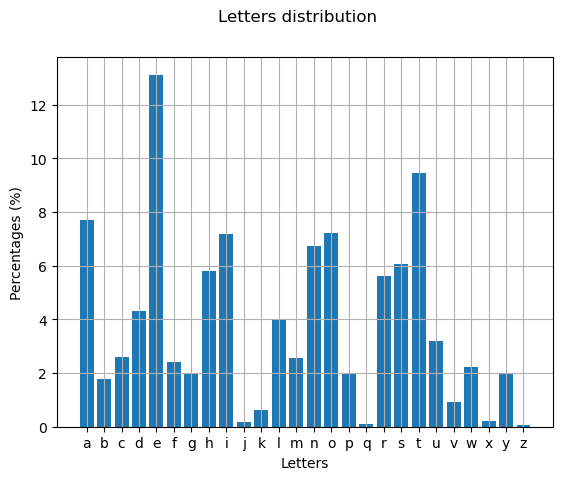

In [91]:
# Plot the distribution
plt.bar(list(alphabet_dict.keys()), alphabet_dict.values())
plt.grid(True)
plt.xlabel('Letters')
plt.ylabel('Percentages (%)')
plt.suptitle('Letters distribution')
plt.show()

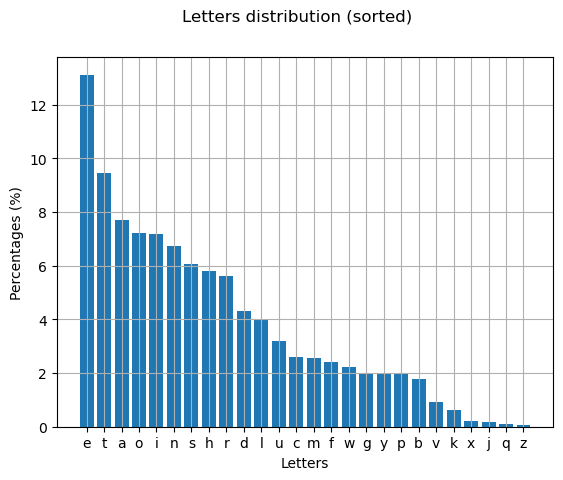

In [92]:
# Sorting the dictionary to have a cleaner sight on the situation
sorted_dict = {key: val for key, val in sorted(alphabet_dict.items(), key = lambda ele: ele[1], reverse = True)}

# Plot the sorted distribution
plt.bar(list(sorted_dict.keys()), sorted_dict.values())
plt.grid(True)
plt.xlabel('Letters')
plt.ylabel('Percentages (%)')
plt.suptitle('Letters distribution (sorted)')
plt.show()

In [93]:
def occur_letter_in_txt(letter, txt):
    
    '''
    Obtain the number of occurrences of a letter in a given text file.
    Parameters
    ----------
    letter: str,
        a letter of which to count the occurrences
    txt: str
        text file in which to count the occurrences

    Return
    ------
    int,
        number of occurences
    '''
    
    alphabet = generate_alphabet()
    
    # check if letter is in alphabet
    if letter in alphabet:
        txt_lower = txt.lower()
        occurrence = txt_lower.count(letter)
    else:
        print(f'The character "{letter}" is not an alphabet symbol')
        occurrence = None
        
    return occurrence

In [94]:
def freq_from_txt(txt):
        
    '''
    Obtain the number of occurrences of each letter of the English
    alphabet in a given text file.
    Parameters
    ----------
    txt: str
        text file in which to count the occurrences 

    Return
    ------
    dict,
        {letter: frequency of occurence}
    '''
    
    ## obtain the English alphabet ##
    alphabet = generate_alphabet()
    
    # obtain occurrences 
    occurrences = tuple([occur_letter_in_txt(letter, txt) for letter in alphabet])
    # compute occurrences 
    frequencies = occurrences / np.sum(occurrences)
    # store data in a dictionary
    dictionary = dict(zip(alphabet, frequencies))
    
    return dictionary

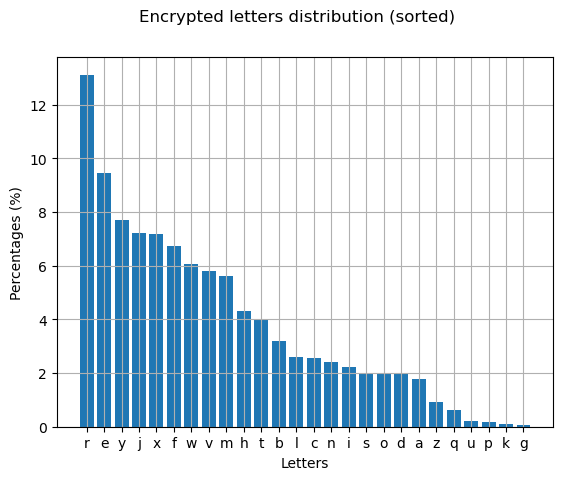

In [95]:
# Perform the Frequency Analysis attack

# Get the letter distribution of the cipher
encoded_alphabet_dict = freq_from_txt(cipher)

for element in encoded_alphabet_dict.keys():
    encoded_alphabet_dict[element] = encoded_alphabet_dict[element] * 100

# Sort the frequency values
sorted_encoded_dict = {key: val for key, val in sorted(encoded_alphabet_dict.items(), key = lambda ele: ele[1], reverse = True)}

# Plot the distribution
plt.bar(list(sorted_encoded_dict.keys()), sorted_dict.values())
plt.grid(True)
plt.xlabel('Letters')
plt.ylabel('Percentages (%)')
plt.suptitle('Encrypted letters distribution (sorted)')
plt.show()

# Start decoding
x = list(sorted_dict.keys())
y = list(sorted_encoded_dict.keys())
z = list(sorted_encoded_dict.keys())

for j in range(3): # The number inside range() function indicates how many letters are substituted
                   # : we change only the first three letters, being the ones we can be sure the most
    temp = x[j]
    for i in range(len(y)):
        if (y[i] == temp):
            y[i] = y[j]
    y[j] = x[j]

#decoding_rule = dict(zip(y, z))   # Only the first three letters changed
decoding_rule = dict(zip(sorted_dict.keys(), sorted_encoded_dict.keys())) # All letters changed accordingly to the distribution --> start from here to find the key
plain = substitution_decoding(cipher, decoding_rule)

From this first step we've only found the first three letters, now we have to proceed in discovering all the others: for example we could look for particular patterns in the partially decrypted text, and step by step solving the whole problem.

In [96]:
# Print decrypted plaintext and the key (shift)
""" decoding_rule = {
    'e': 'r',
    't': 'e',
    'a': 'y',
    '': '',
    '': '',
    '': '',
    '': '',
    '': '',
    '': '',
    '': '',
    '': '',
    '': '',
    '': '',
    '': '',
    '': '',
    '': '',
    '': '',
    '': '',
    '': '',
    '': '',
    '': '',
    '': '',
    '': '',
    '': '',
    '': '',
    '': '',
} """

print(decoding_rule)
print(plain)

{'e': 'r', 't': 'e', 'a': 'y', 'o': 'j', 'i': 'x', 'n': 'f', 's': 'w', 'h': 'v', 'r': 'm', 'd': 'h', 'l': 't', 'u': 'b', 'c': 'l', 'm': 'c', 'f': 'n', 'w': 'i', 'g': 's', 'y': 'o', 'p': 'd', 'b': 'a', 'v': 'z', 'k': 'q', 'x': 'u', 'j': 'p', 'q': 'k', 'z': 'g'}
ldamue edpnnu srattnt (afhid 30, 1916 – webhmahy 24, 2001) pas at acehilat caorecaoiliat, edelohilad etgiteeh, atu lhyfonghafreh ktnpt as "ore waoreh nw itwnhcaoint orenhy". srattnt is tnoeu wnh ravitg wnmtueu itwnhcaoint orenhy pior a datucahk fafeh, "a caorecaoilad orenhy nw lnccmtilaoint", prilr re fmbdisreu it 1948.
re is adsn pedd ktnpt wnh wnmtuitg uigioad lihlmio uesigt orenhy it 1937, pret—as a 21-yeah-ndu casoeh's ueghee somueto ao ore cassalrmseoos itsoiomoe nw oelrtndngy (cio)—re phnoe ris oresis uecntsohaoitg orao edelohilad affdilaoints nw bnndeat adgebha lnmdu lntsohmlo aty dngilad tmcehilad hedaointsrif. srattnt lntohibmoeu on ore wiedu nw lhyfoatadysis wnh taointad uewetse umhitg pnhdu pah ii, itldmuitg ris wmtuac

For example, in the first lines of the text, between parenthesis, we can find something which surely is a time period, defined by two distinct dates; from that we can gather many useful information:

(ynvxh 30, 1916 – iravcyvo 24, 2001) could be decrypted as: (april 30, 1916 - february 24 - 2001)

Encrypted letter -> English letter

v -> r, i -> f, a -> b, c -> u, o -> y, x -> i, h -> l, n -> p

This way I can continue untill I succeed in finding the complete key:

axfsvynmo could be: biography

m -> h, s -> g, f -> o

tvonjfsvynmrv could be: cryptographer

t -> c, j -> t

e -> n

b -> d

d -> w

w -> s

q -> k

p -> x

z -> v

u -> j

In [97]:
# Print decrypted plaintext and the key (shift)
decoding_rule = { 
    'a': 'y', 
    'b': 'a',
    'c': 't',
    'd': 'b',
    'e': 'r',
    'f': 'i',
    'g': 's',
    'h': 'm', 
    'i': 'x', 
    'j': 'u', 
    'k': 'q',
    'l': 'h', 
    'm': 'l', 
    'n': 'e', 
    'o': 'f', 
    'p': 'n', 
    'q': 'k',
    'r': 'v', 
    's': 'w', 
    't': 'j',
    'u': 'c', 
    'v': 'z', 
    'w': 'd', 
    'x': 'p', 
    'y': 'o', 
    'z': 'g',
}

print("The key is given by the following dictionary: \nThe keys represent the english letters, the values are the corresponding encrypted letters")
print(decoding_rule)

plain = substitution_decoding(cipher, decoding_rule)
print(plain)

The key is given by the following dictionary: 
The keys represent the english letters, the values are the corresponding encrypted letters
{'a': 'y', 'b': 'a', 'c': 't', 'd': 'b', 'e': 'r', 'f': 'i', 'g': 's', 'h': 'm', 'i': 'x', 'j': 'u', 'k': 'q', 'l': 'h', 'm': 'l', 'n': 'e', 'o': 'f', 'p': 'n', 'q': 'k', 'r': 'v', 's': 'w', 't': 'j', 'u': 'c', 'v': 'z', 'w': 'd', 'x': 'p', 'y': 'o', 'z': 'g'}
claude elwood shannon (april 30, 1916 – february 24, 2001) was an american mathematician, electrical engineer, and cryptographer known as "the father of information theory". shannon is noted for having founded information theory with a landmark paper, "a mathematical theory of communication", which he published in 1948.
he is also well known for founding digital circuit design theory in 1937, when—as a 21-year-old master's degree student at the massachusetts institute of technology (mit)—he wrote his thesis demonstrating that electrical applications of boolean algebra could construct any logica

### Bonus Task 1 - Performed with frequency analysis

To do this we can observe the letter distribution of the plain text given by each brute force attempt, and take the key of the most similar distribution.

In [98]:
# AUTHOMATIC ALGORITHM 1
alphabet = generate_alphabet()
distribution = tuple(alphabet_dict.values())
rmse = 1000 # root mean squared error, initialized to a large number
key1 = 0

for number in range(len(alphabet)):
    plain = caesar_decoding(cipher_ceasar, shift=number)
    plain_distribution = freq_from_txt(plain)
    
    for element in plain_distribution.keys():
        plain_distribution[element] = plain_distribution[element] * 100 # I prefer working with percentages

    distribution_plain = tuple(plain_distribution.values())
    squared_sum_error = 0
    for i, value in enumerate(distribution):
        squared_sum_error += (value - distribution_plain[i]) ** 2
    err = math.sqrt(squared_sum_error / len(distribution))
    if (err < rmse): # We want to keep the key associated to the smallest error
        rmse = err
        key1 = number

print("The key is: " + str(key1))

The key is: 14


### Bonus Task 2 - Performed with the library PyEnchant

To perform this kind of check on the decryption we need a way to understand whether one word is actually an English word; there is an interesting Python library that can help: **PyEnchant**.

In [99]:
# AUTHOMATIC ALGORITHM 2
alphabet = generate_alphabet()
d = enchant.Dict("en_US") # We take advantage of this great library, PyEnchant, which allows to check if a word is in a certain language or not
key2 = 0

for number in range(len(alphabet)):
    word1 = ""
    word2 = ""
    word3 = ""
    letter = True
    word_n = 0
    plain = caesar_decoding(cipher_ceasar, shift=number)

    for character in plain:
        if character not in string.ascii_lowercase: # We want to extract the first three words of the obtained plain text so, when we find a character that is not a letter, we change word, untill we get three of them
            letter = False
        elif (character in string.ascii_lowercase and letter == False):
            letter = True
            word_n += 1

        if (word_n == 0 and letter):
            word1 += character
        if (word_n == 1 and letter):
            word2 += character
        if (word_n == 2 and letter):
            word3 += character
        if (word_n == 3 and not letter): # When we have the three words we are done
            break

    if (d.check(word1) and d.check(word2) and d.check(word3)): # We check if the extracter dectrypted words are actually English words, if not, we try the next key
        break                                                  # I decided to use three words instead of just one to be more sure about the validity of the decryption

key2 = number
print("The key is: " + str(key2))

The key is: 14
